In [120]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [121]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [122]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-01_no_earlystopping_shuffled.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [123]:
len(bdd)

60

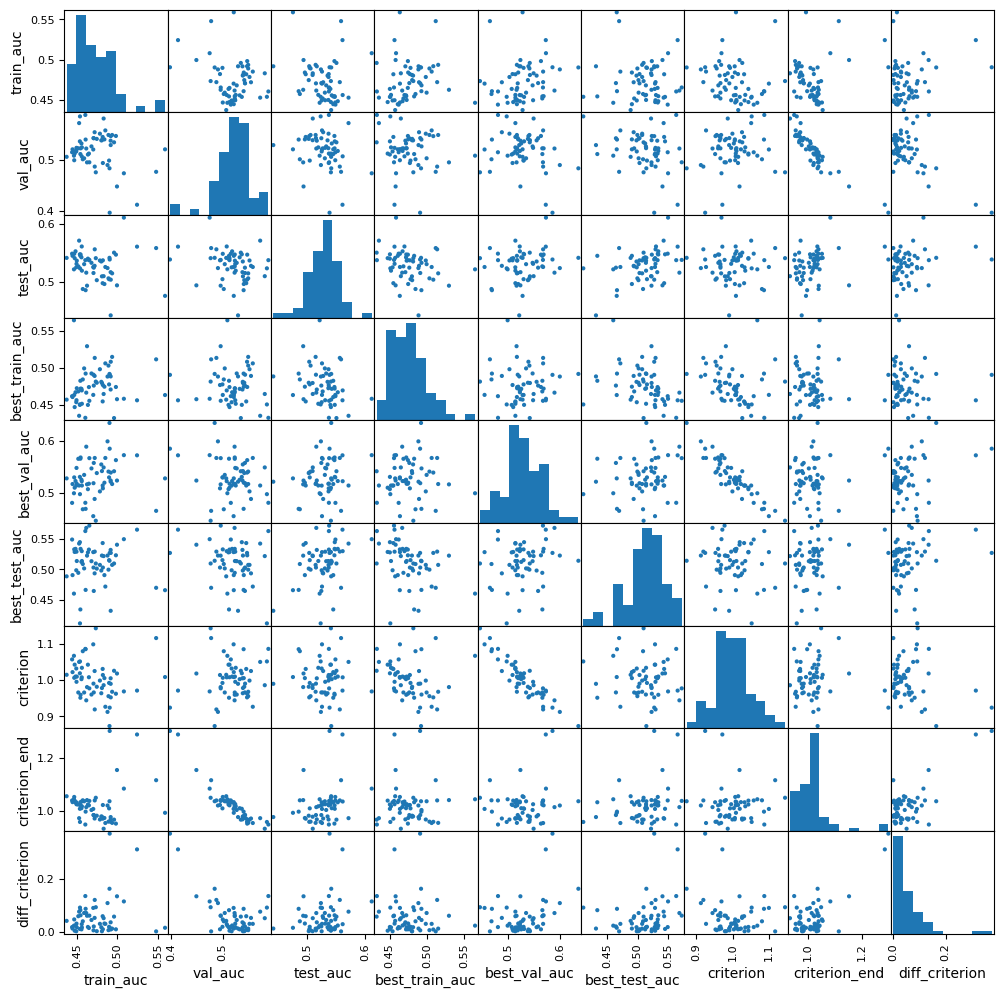

In [124]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)

In [125]:
# bdd[bdd['best_test_auc']>0.6]['model_path'].iat[0]

Text(0, 0.5, 'best_test_auc')

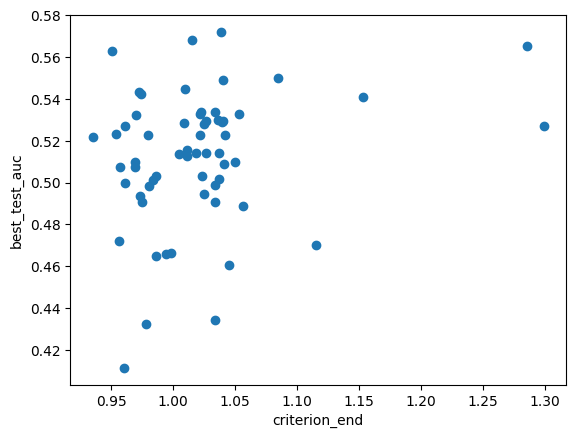

In [126]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

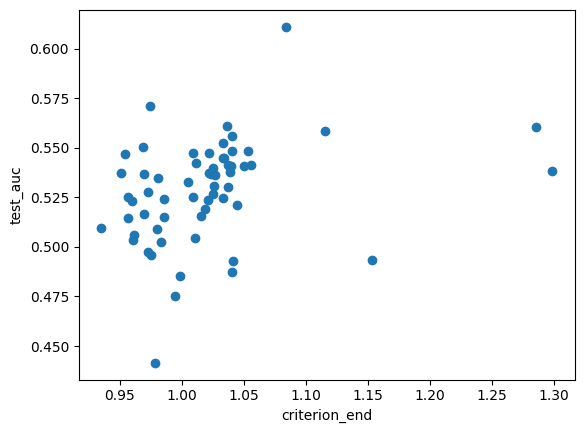

In [179]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

In [188]:
quantile = []
test_auc = []
test_auc_cum = []
delta=0.1
quantile_x = np.arange(delta,1,delta)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())

(0.5, 0.6)

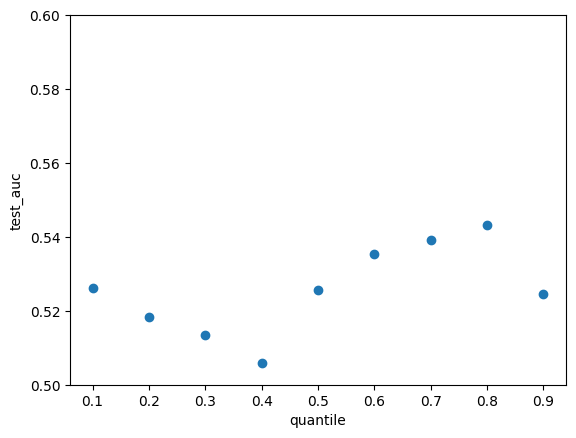

In [189]:
plt.scatter(quantile_x, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.5,0.6))

(0.5, 0.6)

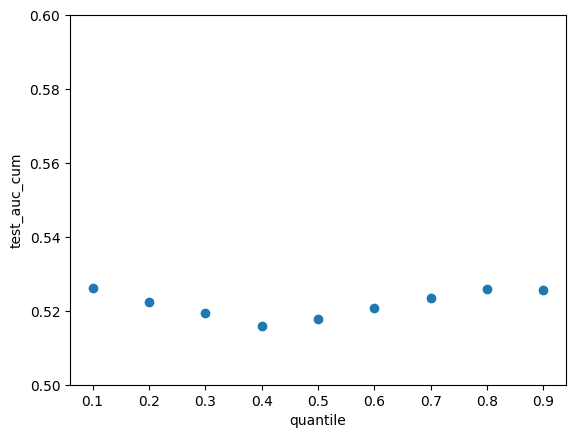

In [190]:
plt.scatter(quantile_x, test_auc_cum)
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.5,0.6))

Text(0, 0.5, 'test_auc')

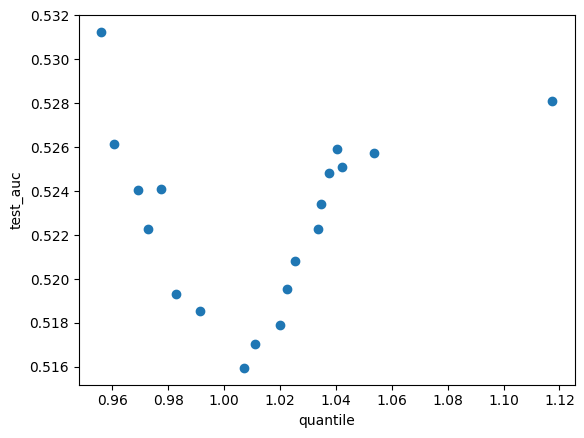

In [130]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

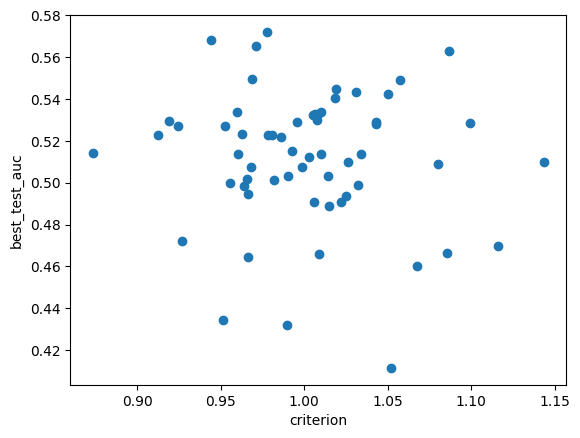

In [131]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [132]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

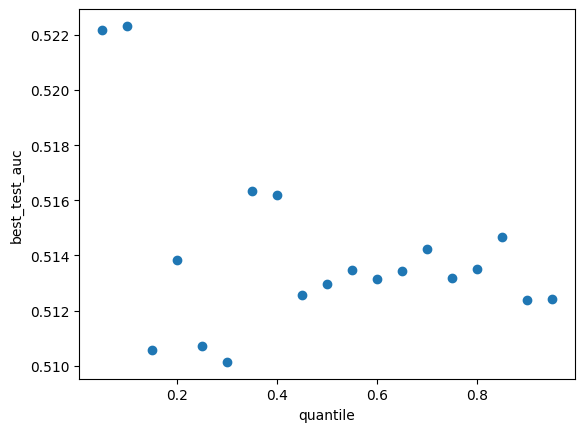

In [133]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

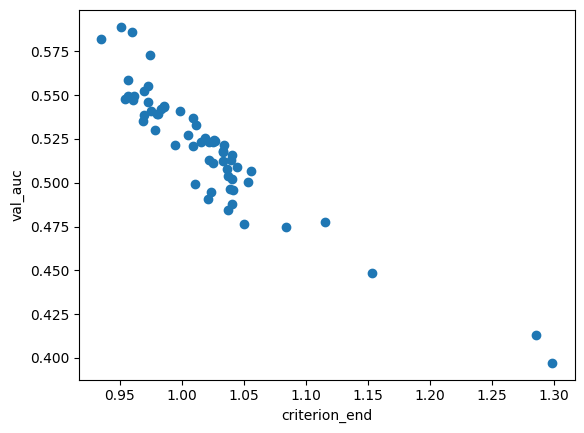

In [134]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

(0.45, 0.7)

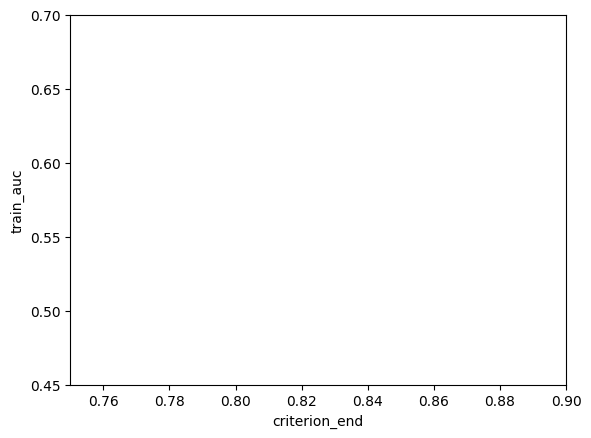

In [135]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")
plt.xlim((0.75,0.9))
plt.ylim((0.45,0.7))

In [136]:
bdd.sort_values(by=['val_auc'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
4,/volatile2/jc225751/Runs/61_classifier_regress...,0.490476,0.397186,0.538484,0.490822,0.584906,0.527199,0.161972,0.968982,0.000927,0.481586,138.831482,0.924272,1.298919,0.374646,-2.363572,-2.270212,-4.525575,-2.827207
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.524306,0.412856,0.560764,0.456488,0.572114,0.565394,0.165700,0.782309,0.000500,0.435735,138.710678,0.971398,1.285739,0.314341,-2.157393,-2.108248,-4.214008,-2.369663
38,/volatile2/jc225751/Runs/61_classifier_regress...,0.499496,0.448673,0.493634,0.457977,0.523505,0.540654,0.172357,0.983010,0.000606,0.393535,138.631058,1.018518,1.153477,0.134960,-2.725282,-2.799785,-4.459745,-2.385719
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.508019,0.474576,0.611111,0.458564,0.572434,0.549769,0.167347,0.947920,0.000543,0.242389,138.568359,0.969002,1.084291,0.115288,-2.172701,-3.136303,-4.231820,-2.392116
43,/volatile2/jc225751/Runs/61_classifier_regress...,0.473279,0.476495,0.540799,0.481734,0.446114,0.509838,0.176881,0.992825,0.000372,0.273767,123.311066,1.143391,1.050226,0.093165,-3.334848,-4.326306,-4.705720,-2.684350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,/volatile2/jc225751/Runs/61_classifier_regress...,0.485090,0.558682,0.525463,0.506312,0.566997,0.471933,0.160284,0.954864,0.000865,0.472496,138.687775,0.926691,0.956228,0.029537,-2.802052,-2.481798,-4.819436,-3.130675
59,/volatile2/jc225751/Runs/61_classifier_regress...,0.452636,0.573073,0.571181,0.435582,0.513911,0.542535,0.161673,0.966733,0.000819,0.160544,136.984207,1.050507,0.974291,0.076216,-2.546832,-2.036863,-4.228363,-2.167894
58,/volatile2/jc225751/Runs/61_classifier_regress...,0.482968,0.582028,0.509549,0.465004,0.548769,0.521991,0.165904,0.853976,0.000829,0.155085,137.913651,0.986228,0.935004,0.051223,-2.479738,-2.215864,-4.368683,-2.465147
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.453689,0.586185,0.523148,0.450891,0.497282,0.411458,0.181677,0.757719,0.000495,0.144937,138.370605,1.051828,0.960126,0.091702,-3.070649,-1.948444,-4.666587,-2.311532


Text(0, 0.5, 'best_test_auc')

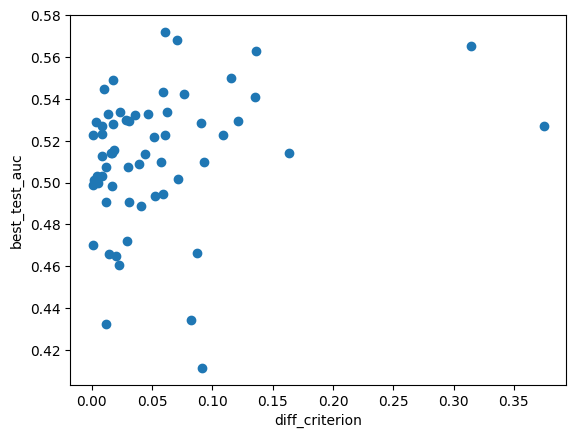

In [137]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

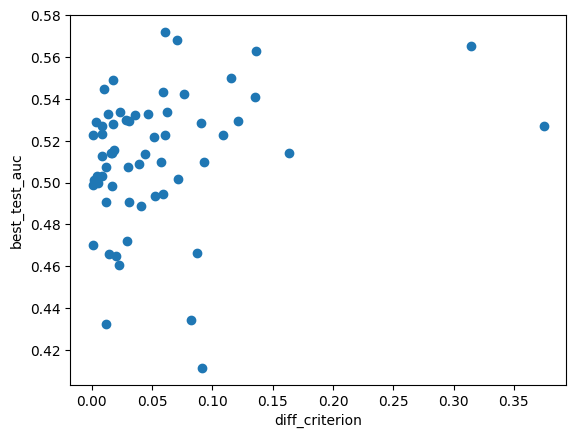

In [138]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

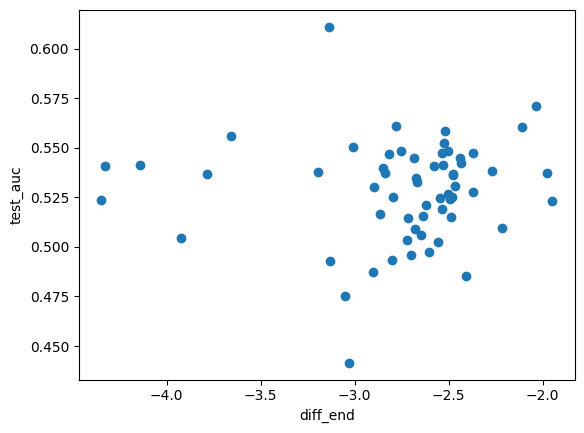

In [139]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

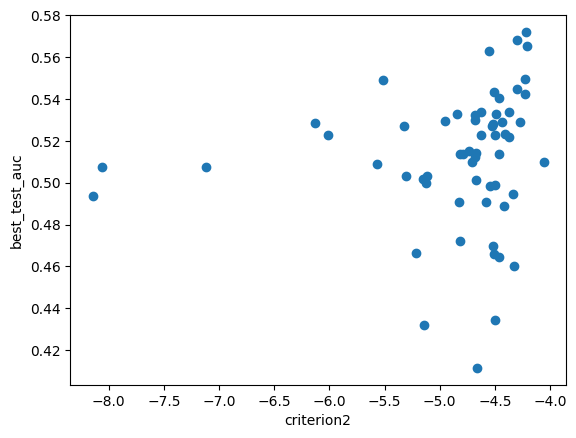

In [140]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

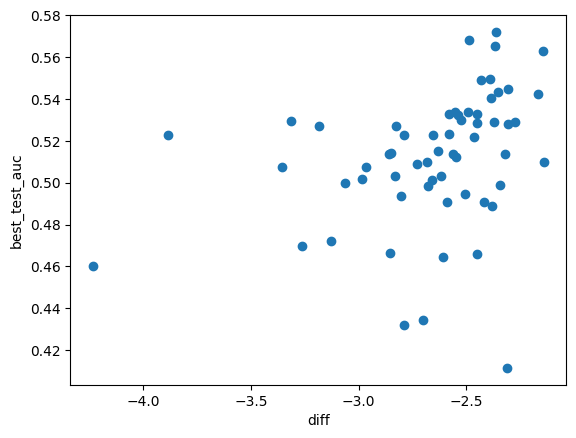

In [141]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

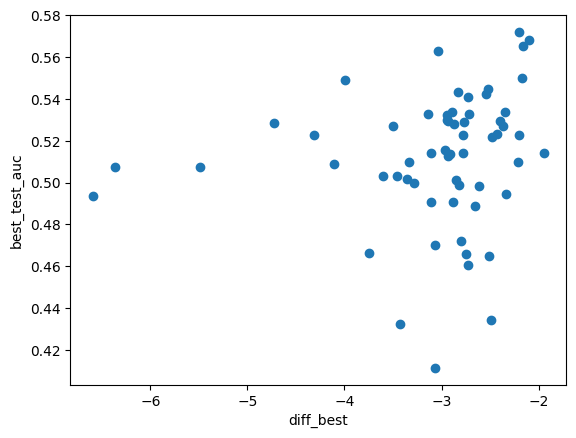

In [142]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

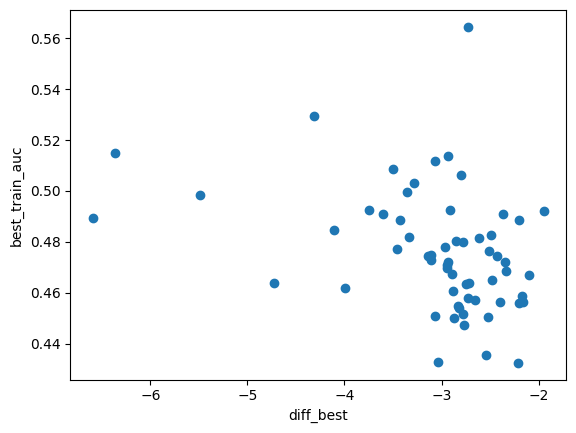

In [143]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

(0.4, 0.65)

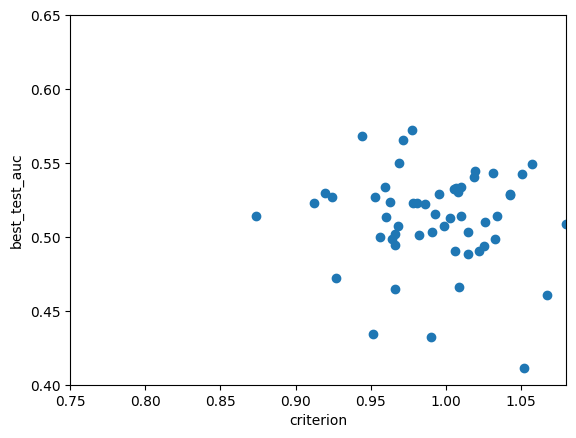

In [144]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.ylim((0.35,0.65))
plt.xlim((0.75,1.08))
plt.ylim((0.4,0.65))

(0.5, 0.65)

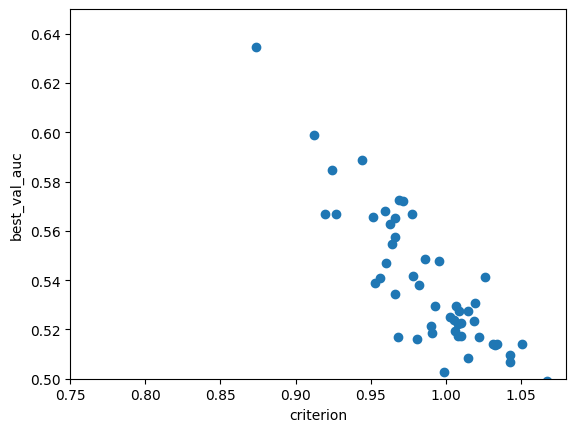

In [145]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")
plt.xlim((0.75,1.08))
plt.ylim((0.5,0.65))

(0.75, 0.9)

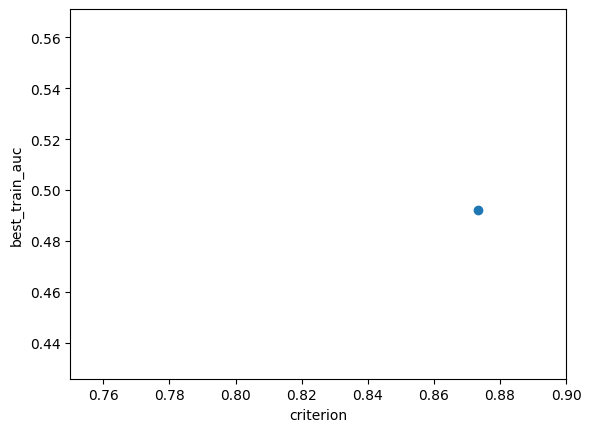

In [146]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")
plt.xlim((0.75,0.9))

(0.75, 0.9)

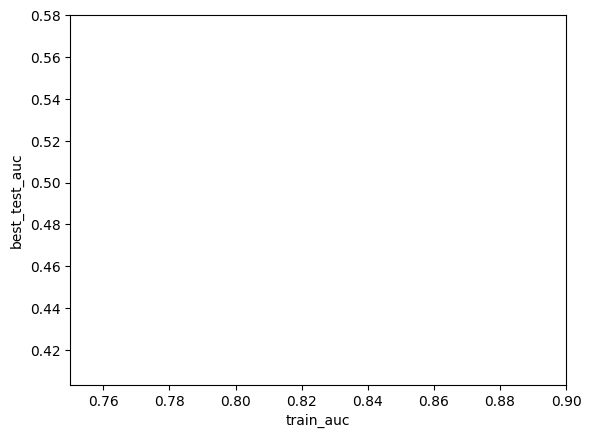

In [147]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'test_auc')

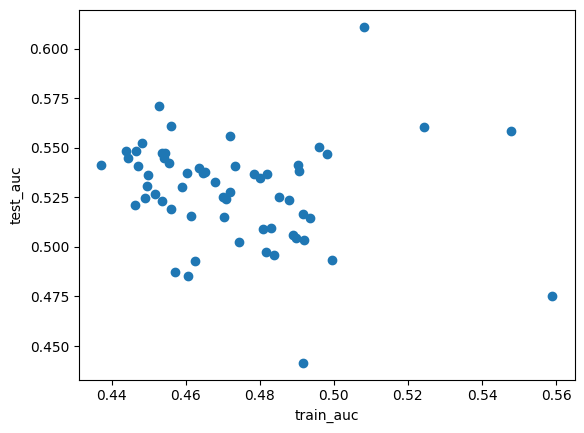

In [148]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

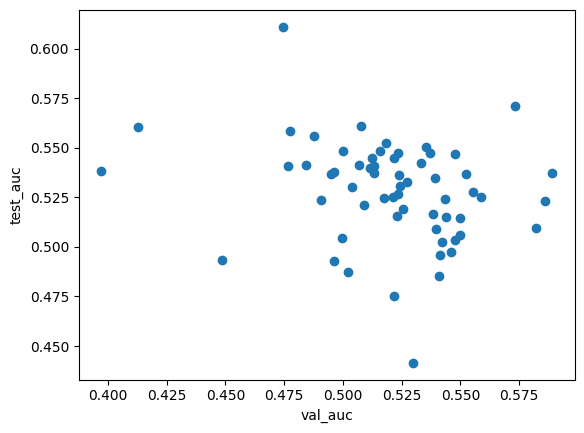

In [149]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

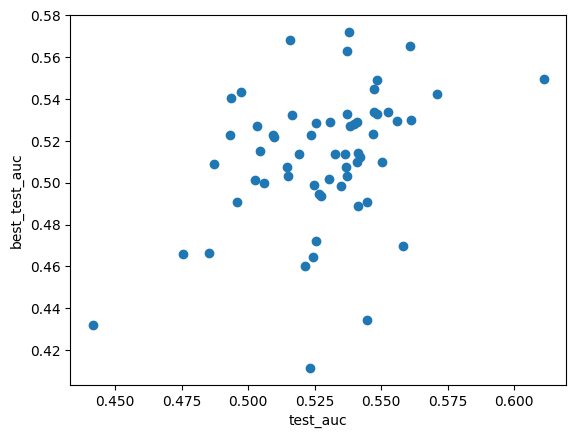

In [150]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

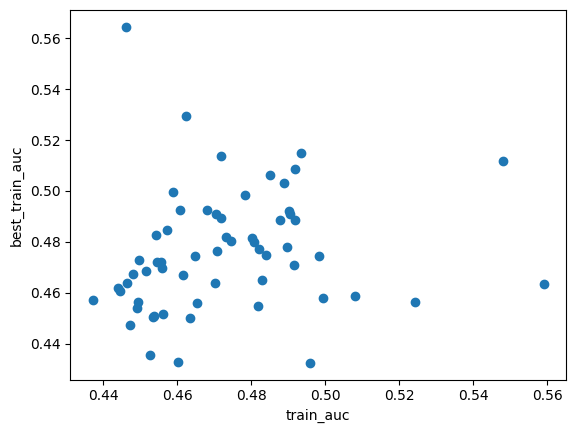

In [151]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

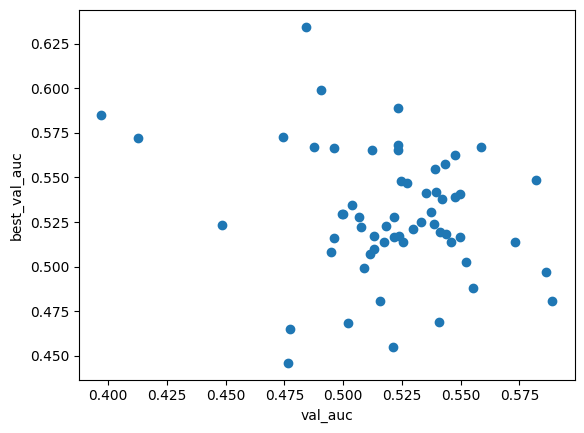

In [152]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

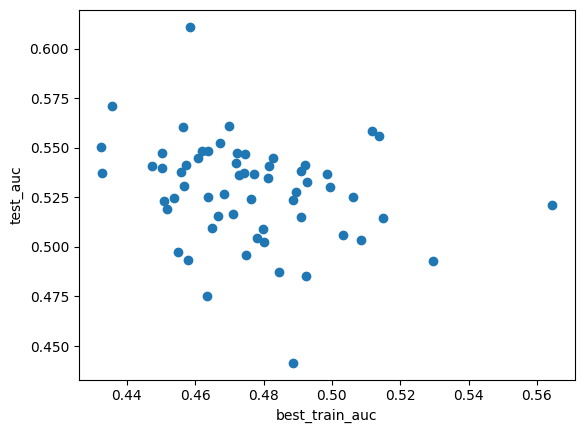

In [153]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

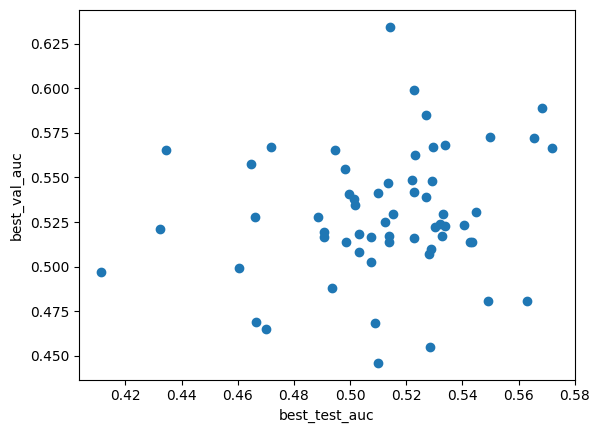

In [154]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

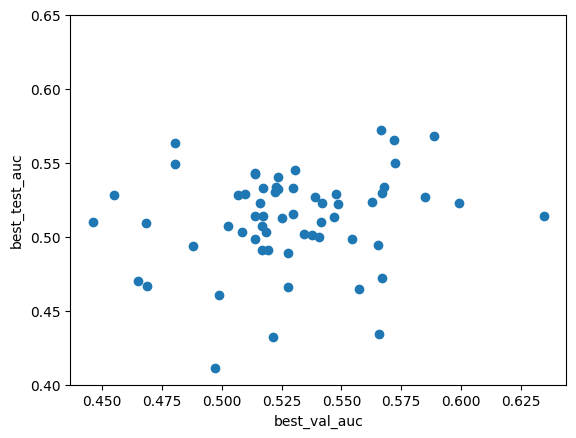

In [155]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

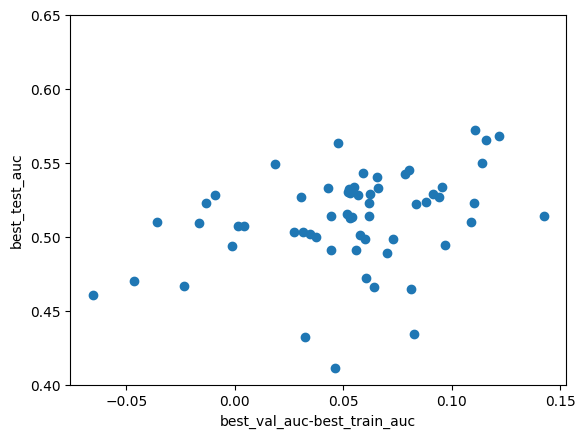

In [156]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

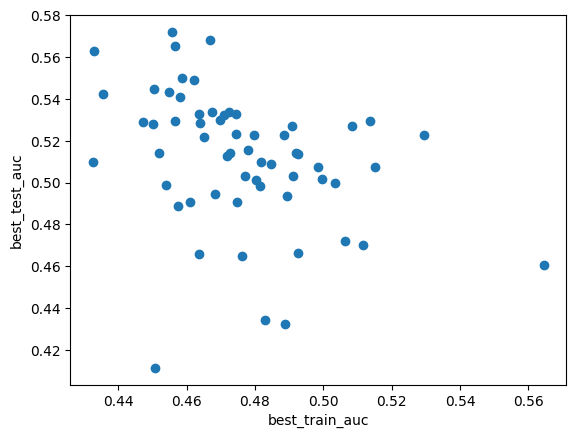

In [157]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

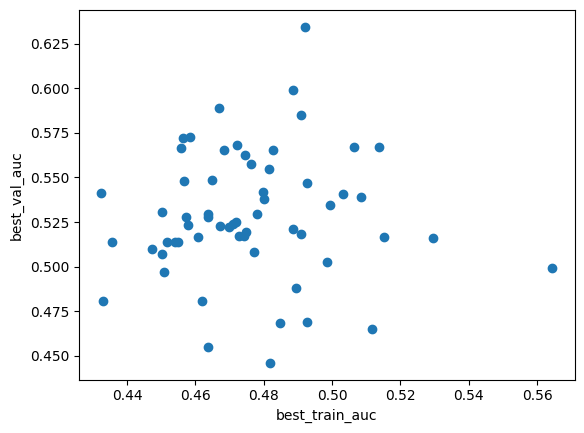

In [158]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

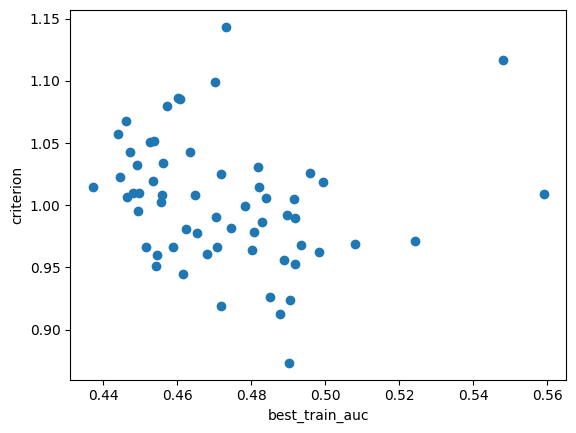

In [159]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

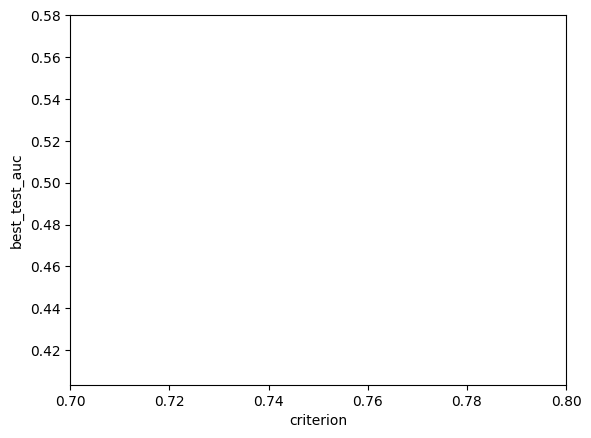

In [160]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

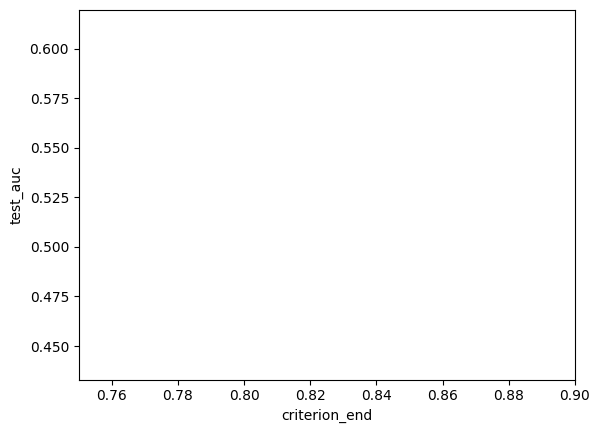

In [161]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

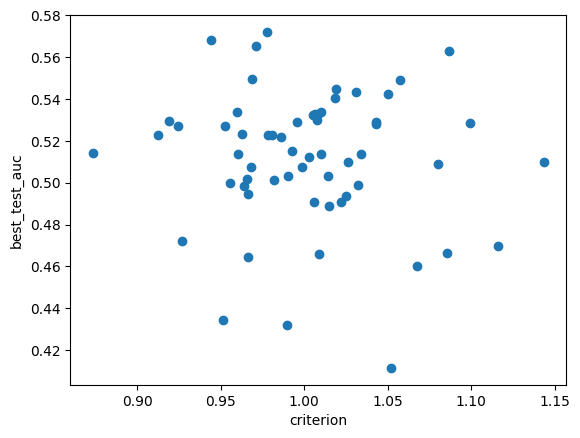

In [162]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

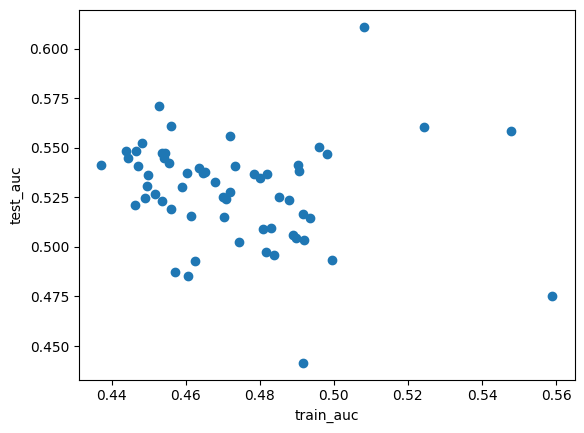

In [163]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

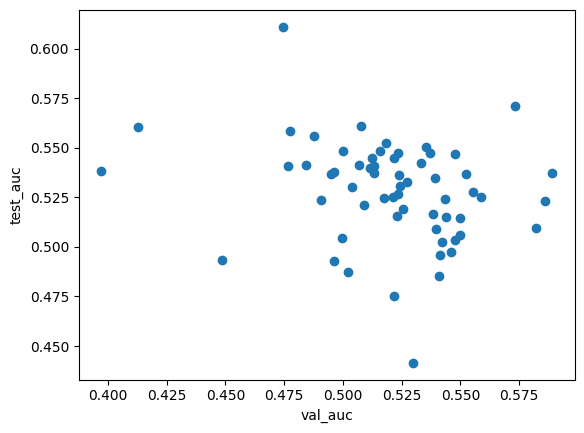

In [164]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

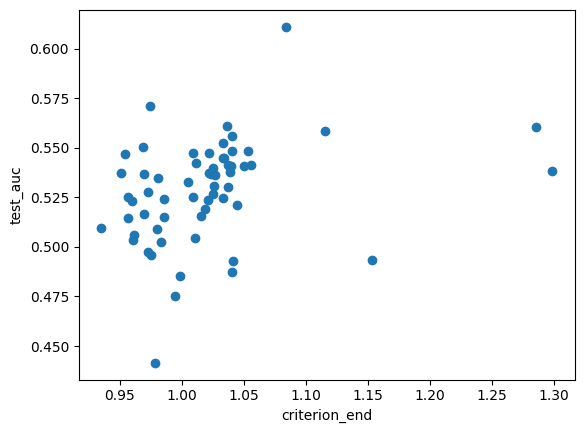

In [165]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

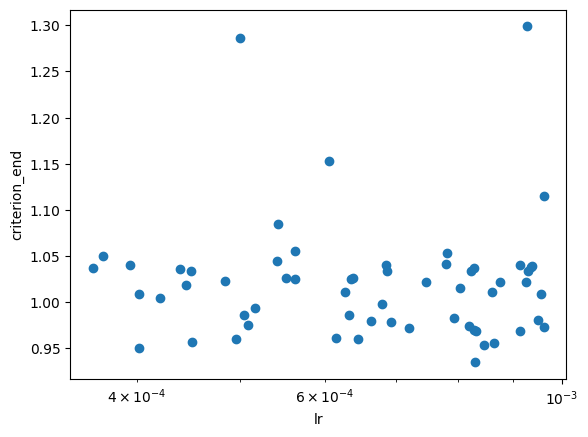

In [166]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

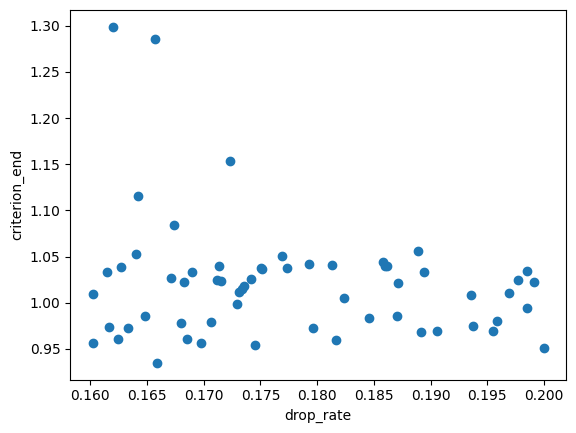

In [167]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_123882/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


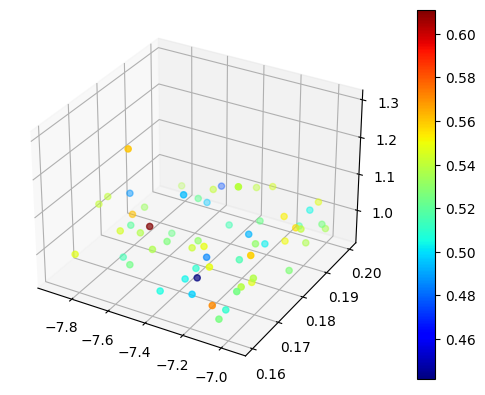

In [168]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_123882/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


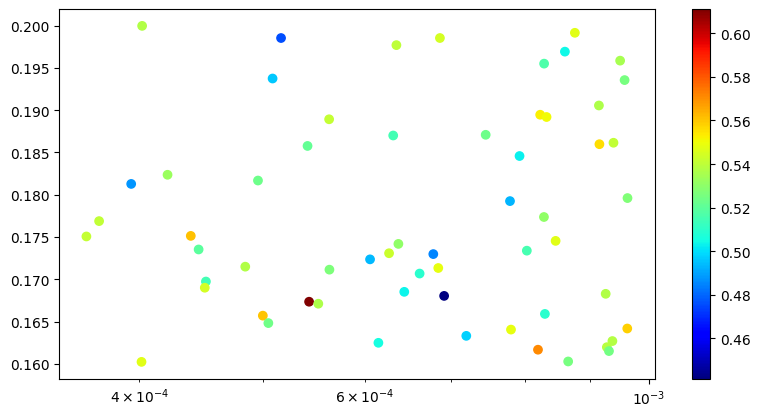

In [169]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_123882/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


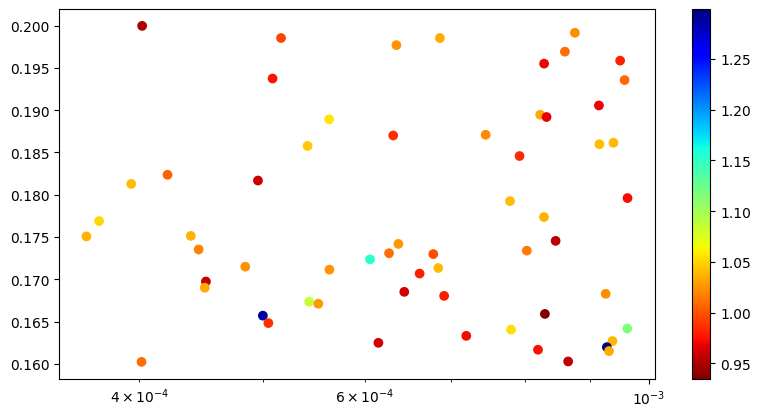

In [170]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

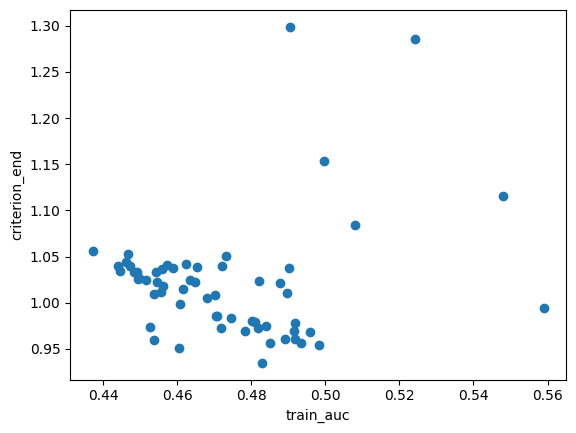

In [171]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

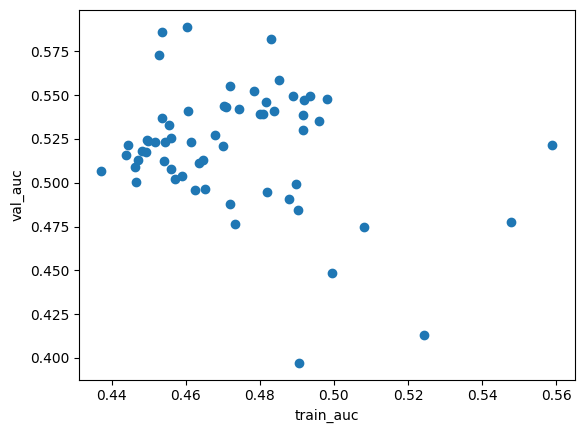

In [172]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

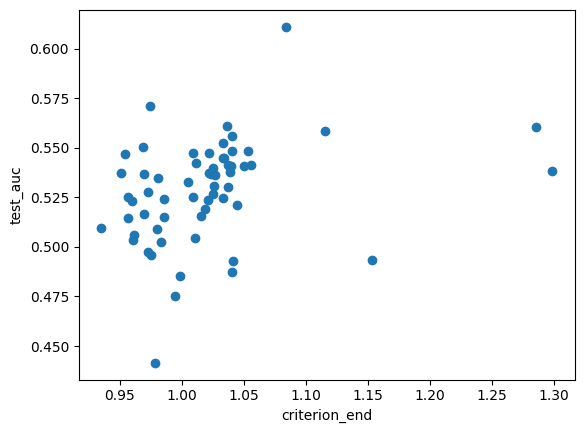

In [173]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

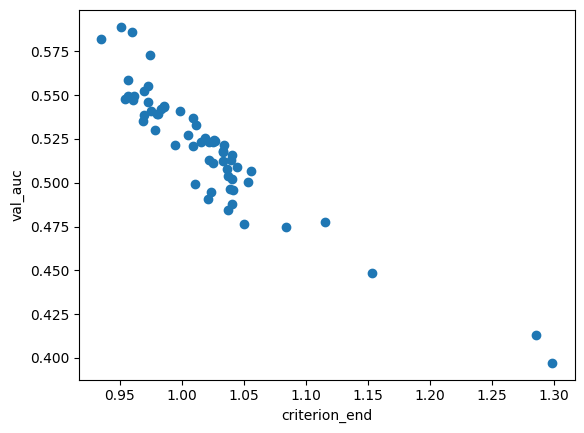

In [174]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

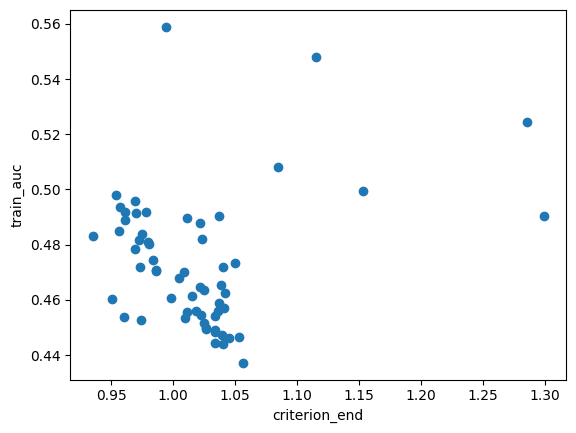

In [175]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [176]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,sigma_noise,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
58,/volatile2/jc225751/Runs/61_classifier_regress...,0.482968,0.582028,0.509549,0.465004,0.548769,0.521991,0.165904,0.853976,0.000829,0.155085,137.913651,0.986228,0.935004,0.051223,-2.479738,-2.215864,-4.368683,-2.465147
52,/volatile2/jc225751/Runs/61_classifier_regress...,0.460317,0.589063,0.537326,0.432866,0.480652,0.563079,0.199964,0.907358,0.000402,0.070018,122.142357,1.086482,0.950620,0.135862,-3.041013,-1.975109,-4.558110,-2.144436
14,/volatile2/jc225751/Runs/61_classifier_regress...,0.498172,0.547809,0.546875,0.474452,0.562840,0.523293,0.174541,0.895664,0.000845,0.357682,138.640488,0.962708,0.954019,0.008689,-2.426025,-2.819471,-4.412631,-2.582991
0,/volatile2/jc225751/Runs/61_classifier_regress...,0.485090,0.558682,0.525463,0.506312,0.566997,0.471933,0.160284,0.954864,0.000865,0.472496,138.687775,0.926691,0.956228,0.029537,-2.802052,-2.481798,-4.819436,-3.130675
51,/volatile2/jc225751/Runs/61_classifier_regress...,0.493500,0.549728,0.514468,0.515068,0.516789,0.507523,0.169736,0.807776,0.000451,0.408974,138.621353,0.968142,0.956772,0.011371,-6.364880,-2.714653,-8.061999,-3.354361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.508019,0.474576,0.611111,0.458564,0.572434,0.549769,0.167347,0.947920,0.000543,0.242389,138.568359,0.969002,1.084291,0.115288,-2.172701,-3.136303,-4.231820,-2.392116
5,/volatile2/jc225751/Runs/61_classifier_regress...,0.547951,0.477454,0.558304,0.511766,0.465142,0.469907,0.164181,0.984609,0.000962,0.154731,138.605408,1.116339,1.115587,0.000751,-3.065651,-2.519544,-4.514427,-3.264024
38,/volatile2/jc225751/Runs/61_classifier_regress...,0.499496,0.448673,0.493634,0.457977,0.523505,0.540654,0.172357,0.983010,0.000606,0.393535,138.631058,1.018518,1.153477,0.134960,-2.725282,-2.799785,-4.459745,-2.385719
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.524306,0.412856,0.560764,0.456488,0.572114,0.565394,0.165700,0.782309,0.000500,0.435735,138.710678,0.971398,1.285739,0.314341,-2.157393,-2.108248,-4.214008,-2.369663


Text(0, 0.5, 'criterion_end')

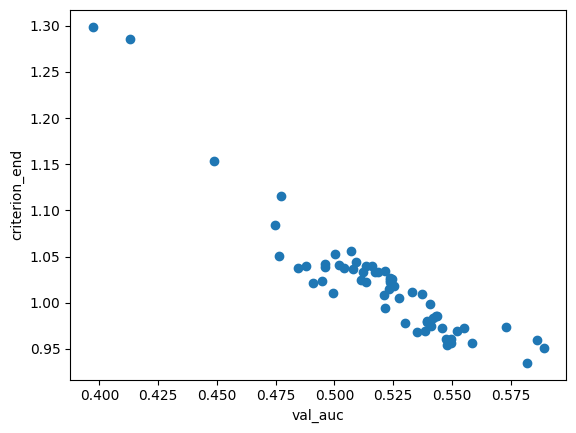

In [177]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

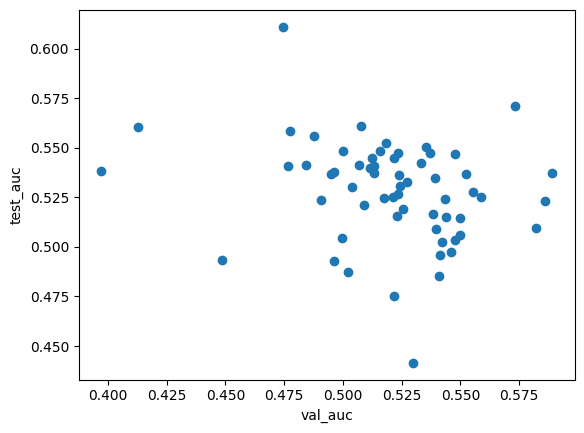

In [178]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")